In [4]:
import networkx as nx
import numpy as np
import grakel as gk # graph kernels module
import matplotlib.pyplot as plt
import scipy
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
import math
from tqdm import tqdm # Estimation of loop time
from datetime import datetime
import os, sys

In [7]:
df = pd.read_pickle("../data/SBM/wl_oa_10samples.pkl")
df.head(10)

,B,H0_true,N,alpha,kernel,lambda,m,n,nr_nodes_1,nr_nodes_2,...,power_avg_degree,power_avg_neigh_degree,power_distfree_b,power_distfree_u,power_max_degree,power_permutation_b,power_permutation_u,power_transitivity,run_time,timestap
0,100.0,0.0,100.0,0.025,"[{'name': 'WL-OA', 'n_iter': 3}]",0.001,10.0,10.0,60.0,60.0,...,0.02,0.04,0.0,0.0,0.11,0.03,0.03,0.03,0:00:18.870197,2021-04-22 21:13:36.607646
1,100.0,0.0,100.0,0.050,"[{'name': 'WL-OA', 'n_iter': 3}]",0.001,10.0,10.0,60.0,60.0,...,0.03,0.10,0.0,0.0,0.13,0.04,0.04,0.08,0:00:18.885167,2021-04-22 21:13:36.607646
2,100.0,0.0,100.0,0.075,"[{'name': 'WL-OA', 'n_iter': 3}]",0.001,10.0,10.0,60.0,60.0,...,0.08,0.15,0.0,0.0,0.17,0.07,0.07,0.12,0:00:18.891151,2021-04-22 21:13:36.607646
3,100.0,0.0,100.0,0.100,"[{'name': 'WL-OA', 'n_iter': 3}]",0.001,10.0,10.0,60.0,60.0,...,0.13,0.17,0.0,0.0,0.25,0.11,0.11,0.12,0:00:18.896137,2021-04-22 21:13:36.607646
4,100.0,0.0,100.0,0.125,"[{'name': 'WL-OA', 'n_iter': 3}]",0.001,10.0,10.0,60.0,60.0,...,0.16,0.20,0.0,0.0,0.31,0.18,0.17,0.17,0:00:18.901124,2021-04-22 21:13:36.607646
5,100.0,0.0,100.0,0.150,"[{'name': 'WL-OA', 'n_iter': 3}]",0.001,10.0,10.0,60.0,60.0,...,0.20,0.23,0.0,0.0,0.35,0.19,0.18,0.17,0:00:18.906111,2021-04-22 21:13:36.607646
6,100.0,0.0,100.0,0.175,"[{'name': 'WL-OA', 'n_iter': 3}]",0.001,10.0,10.0,60.0,60.0,...,0.26,0.28,0.0,0.0,0.40,0.25,0.25,0.18,0:00:18.911097,2021-04-22 21:13:36.607646
7,100.0,0.0,100.0,0.200,"[{'name': 'WL-OA', 'n_iter': 3}]",0.001,10.0,10.0,60.0,60.0,...,0.28,0.29,0.0,0.0,0.44,0.26,0.26,0.23,0:00:18.916084,2021-04-22 21:13:36.607646
8,100.0,0.0,100.0,0.225,"[{'name': 'WL-OA', 'n_iter': 3}]",0.001,10.0,10.0,60.0,60.0,...,0.32,0.31,0.0,0.0,0.51,0.30,0.30,0.24,0:00:18.922068,2021-04-22 21:13:36.607646
9,100.0,0.0,100.0,0.250,"[{'name': 'WL-OA', 'n_iter': 3}]",0.001,10.0,10.0,60.0,60.0,...,0.32,0.31,0.0,0.0,0.54,0.31,0.30,0.26,0:00:18.927055,2021-04-22 21:13:36.607646


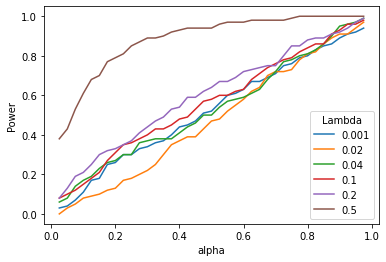

In [9]:
fig, ax = plt.subplots()

for i in np.unique(df['lambda']):
    ax.plot(df['alpha'].loc[(df['lambda'] == i)], df['power_permutation_u'].loc[(df['lambda'] == i)], '-', label=str(i))

# lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_u'].loc[(df['p_edge_1'] == p)], 'x', label='rejections_u')
# lines, = ax.plot(df['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_statistic_b'].loc[(df['p_edge_1'] == p)], '*', label='rejections_statistic_b')
# lines, = ax.plot(df['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_statistic_u'].loc[(df['p_edge_1'] == p)], '+', label='rejections_statistic_u')


ax.legend(title = 'Lambda')
ax.set_xlabel('alpha')
ax.set_ylabel('Power')
plt.show()